# Final exam

## imports

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm


%matplotlib inline

In [97]:
import os
files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
    print(f)

AdvWorksCusts.csv
AW_AveMonthSpend.csv
AW_BikeBuyer.csv
AW_test.csv
FinalExam-Test.zip
FinalExam.zip
FinalExamNotebook.ipynb


## load datasets

In [98]:
AdvWorksCusts = pd.read_csv('AdvWorksCusts.csv')

In [99]:
def count_unique(data, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(data[col].value_counts())
        
def exploreData(data):
    print(data.columns)
    print(data.head())
    print(data.dtypes)
    print(data.describe())
    
def plot_bars(data, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = data[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of bikesales by' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of bikesales')# Set text for y axis
        plt.show()
        
def plot_histogram(data, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        data[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of bikesales')# Set text for y axis
        plt.show()
        
def plot_density_hist(data, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(data[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of bikesales')# Set text for y axis
        plt.show()
        

def plot_box(data, cols, col_y):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=data)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
def plot_violin(data, cols, col_y):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=data)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

In [100]:
exploreData(AdvWorksCusts)

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome'],
      dtype='object')
   CustomerID Title  FirstName MiddleName LastName Suffix  \
0       11000   NaN        Jon          V     Yang    NaN   
1       11001   NaN     Eugene          L    Huang    NaN   
2       11002   NaN      Ruben        NaN   Torres    NaN   
3       11003   NaN    Christy        NaN      Zhu    NaN   
4       11004   NaN  Elizabeth        NaN  Johnson    NaN   

          AddressLine1 AddressLine2         City StateProvinceName  \
0      3761 N. 14th St          NaN  Rockhampton        Queensland   
1           2243 W St.          NaN      Seaford          Victoria   
2     5844 Lind

In [101]:
count_unique(AdvWorksCusts,['Title', 'Suffix', 'CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus'])


For column Title
Mr.     43
Ms.     38
Sr.      4
Mrs.     2
Ms       1
Name: Title, dtype: int64

For column Suffix
Jr.    2
Name: Suffix, dtype: int64

For column CountryRegionName
United States     6986
Australia         3217
United Kingdom    1715
France            1602
Germany           1588
Canada            1411
Name: CountryRegionName, dtype: int64

For column Education
Bachelors              4792
Partial College        4484
High School            2968
Graduate Degree        2863
Partial High School    1412
Name: Education, dtype: int64

For column Occupation
Professional      4963
Skilled Manual    4065
Management        2734
Clerical          2619
Manual            2138
Name: Occupation, dtype: int64

For column Gender
M    8351
F    8168
Name: Gender, dtype: int64

For column MaritalStatus
M    8917
S    7602
Name: MaritalStatus, dtype: int64


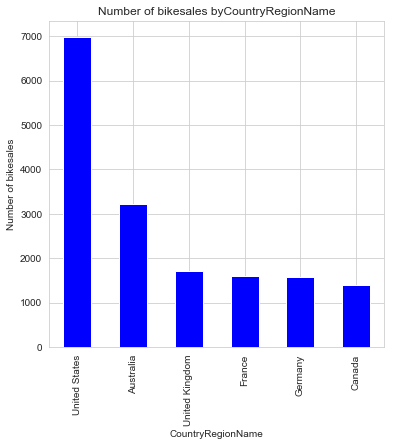

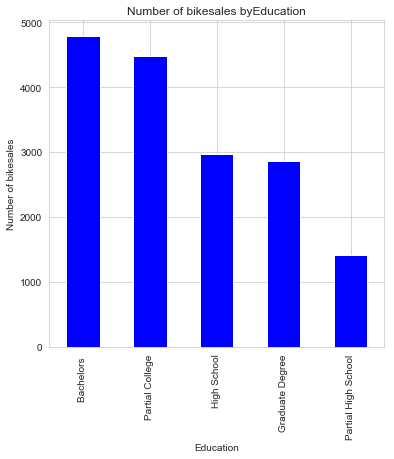

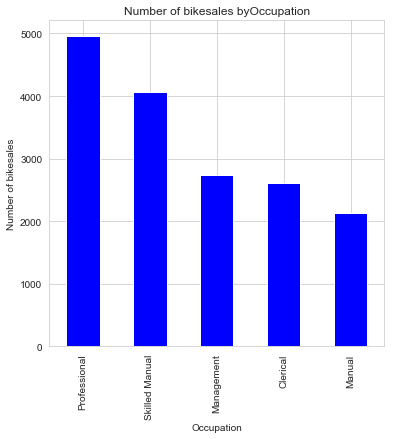

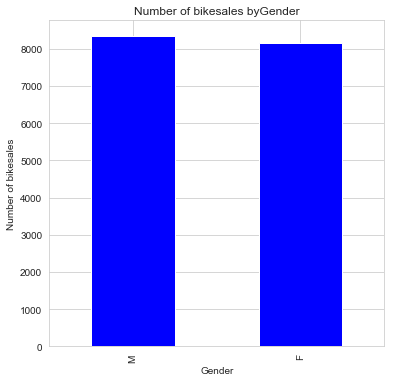

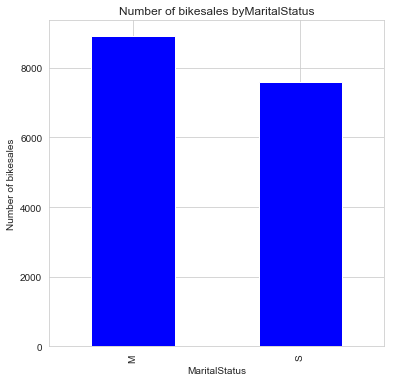

In [102]:
plot_bars(AdvWorksCusts,['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus'])

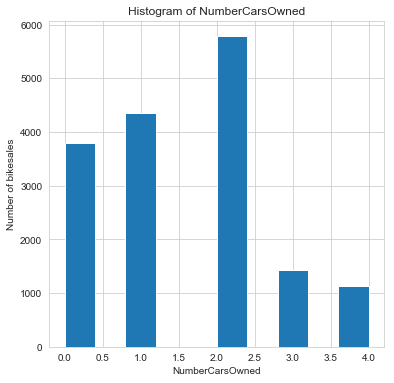

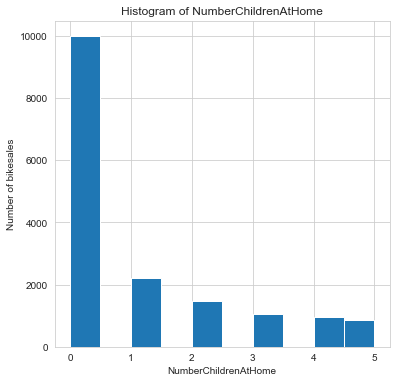

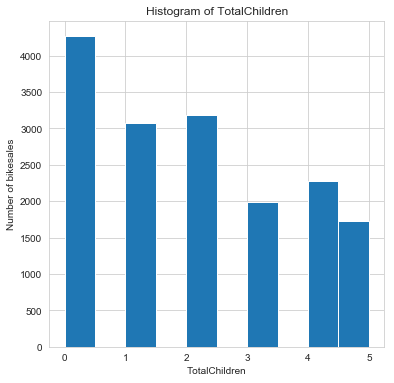

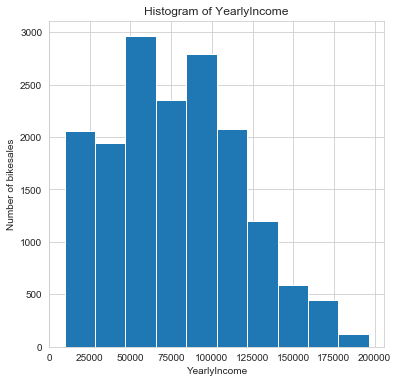

In [103]:
plot_histogram(AdvWorksCusts,['NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome'])

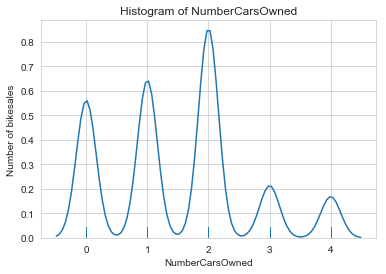

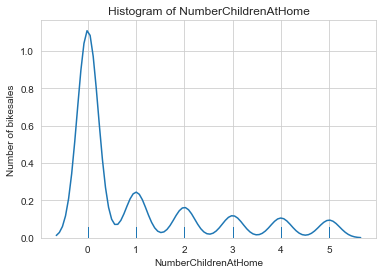

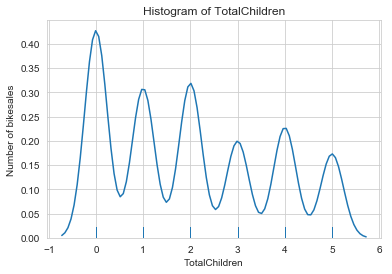

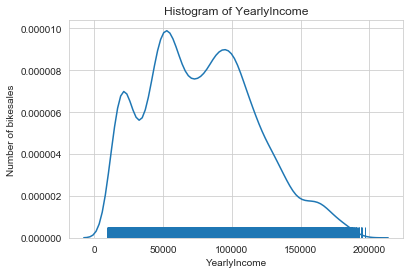

In [104]:
plot_density_hist(AdvWorksCusts,['NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome'])

In [105]:
AW_AveMontSpend = pd.read_csv('AW_AveMonthSpend.csv')

In [106]:
exploreData(AW_AveMontSpend)

Index(['CustomerID', 'AveMonthSpend'], dtype='object')
   CustomerID  AveMonthSpend
0       11000             89
1       11001            117
2       11002            123
3       11003             50
4       11004             95
CustomerID       int64
AveMonthSpend    int64
dtype: object
         CustomerID  AveMonthSpend
count  16519.000000   16519.000000
mean   20234.225195      72.405957
std     5342.515987      27.285370
min    11000.000000      22.000000
25%    15604.500000      52.000000
50%    20221.000000      68.000000
75%    24860.500000      84.000000
max    29482.000000     176.000000


In [107]:
AW_AveMontSpend['AveMonthSpend'].median()

68.0

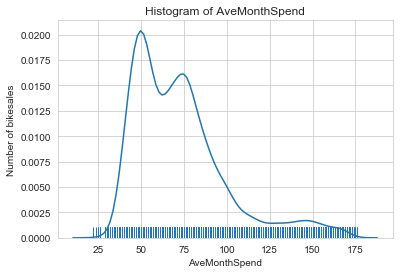

In [108]:
plot_density_hist(AW_AveMontSpend,['AveMonthSpend'])

In [109]:
AW_BikeBuyer = pd.read_csv('AW_BikeBuyer.csv')

In [110]:
exploreData(AW_BikeBuyer)

Index(['CustomerID', 'BikeBuyer'], dtype='object')
   CustomerID  BikeBuyer
0       11000          0
1       11001          1
2       11002          0
3       11003          0
4       11004          1
CustomerID    int64
BikeBuyer     int64
dtype: object
         CustomerID     BikeBuyer
count  16519.000000  16519.000000
mean   20234.225195      0.332284
std     5342.515987      0.471046
min    11000.000000      0.000000
25%    15604.500000      0.000000
50%    20221.000000      0.000000
75%    24860.500000      1.000000
max    29482.000000      1.000000


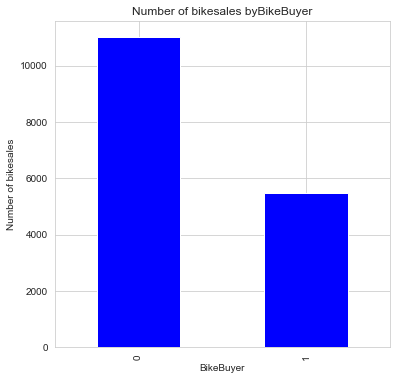

In [111]:
plot_bars(AW_BikeBuyer,['BikeBuyer'])

In [112]:
AdvWorksCustsMerged = AdvWorksCusts

In [113]:
AdvWorksCustsMerged = pd.merge(AdvWorksCusts, AW_AveMontSpend, on='CustomerID', how='inner')

In [114]:
exploreData(AdvWorksCustsMerged)

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend'],
      dtype='object')
   CustomerID Title  FirstName MiddleName LastName Suffix  \
0       11000   NaN        Jon          V     Yang    NaN   
1       11001   NaN     Eugene          L    Huang    NaN   
2       11002   NaN      Ruben        NaN   Torres    NaN   
3       11003   NaN    Christy        NaN      Zhu    NaN   
4       11004   NaN  Elizabeth        NaN  Johnson    NaN   

          AddressLine1 AddressLine2         City StateProvinceName  \
0      3761 N. 14th St          NaN  Rockhampton        Queensland   
1           2243 W St.          NaN      Seaford          Victoria  

In [115]:
AdvWorksCustsMergedFull = pd.merge(AdvWorksCustsMerged, AW_BikeBuyer, on='CustomerID', how='inner')
AdvWorksCustsMergedFull.drop_duplicates(subset= 'CustomerID', keep = 'first', inplace= True)

In [116]:
exploreData(AdvWorksCustsMergedFull)

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'BikeBuyer'],
      dtype='object')
   CustomerID Title  FirstName MiddleName LastName Suffix  \
0       11000   NaN        Jon          V     Yang    NaN   
1       11001   NaN     Eugene          L    Huang    NaN   
2       11002   NaN      Ruben        NaN   Torres    NaN   
3       11003   NaN    Christy        NaN      Zhu    NaN   
4       11004   NaN  Elizabeth        NaN  Johnson    NaN   

          AddressLine1 AddressLine2         City StateProvinceName    ...      \
0      3761 N. 14th St          NaN  Rockhampton        Queensland    ...       
1           2243 W St.          N

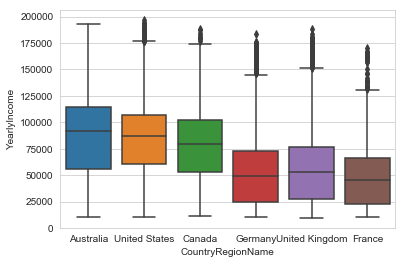

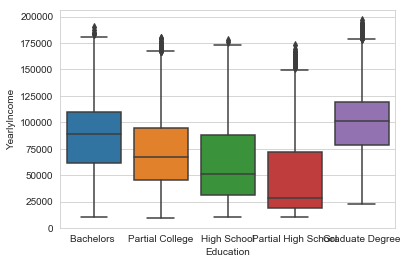

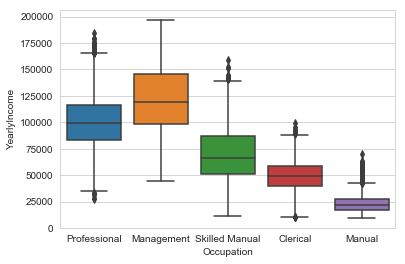

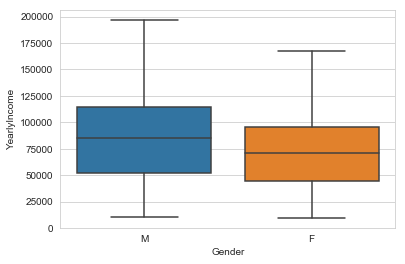

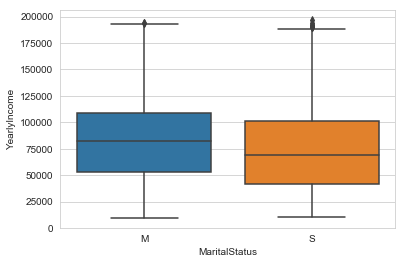

In [117]:
plot_box(AdvWorksCustsMergedFull, ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus'],'YearlyIncome' )

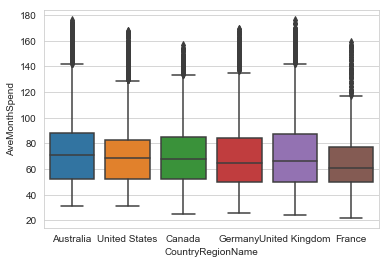

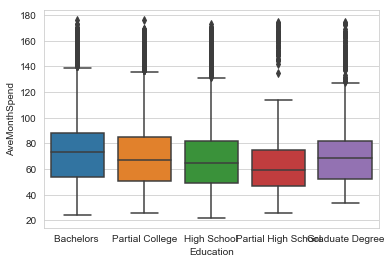

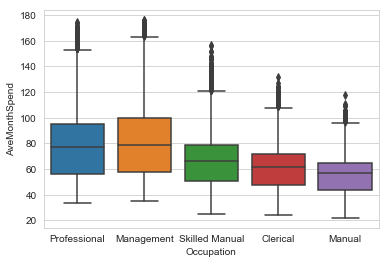

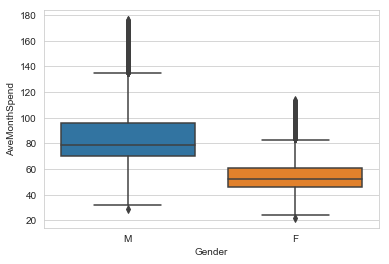

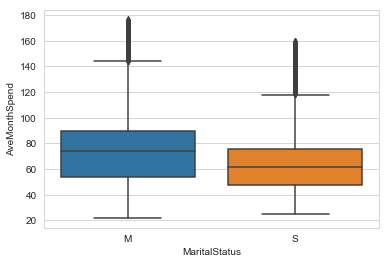

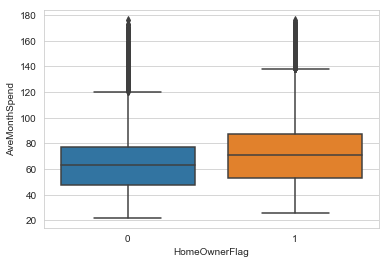

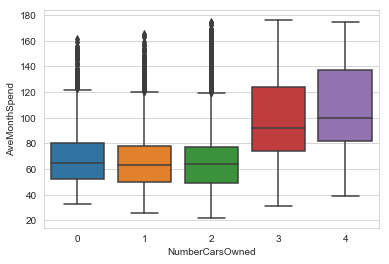

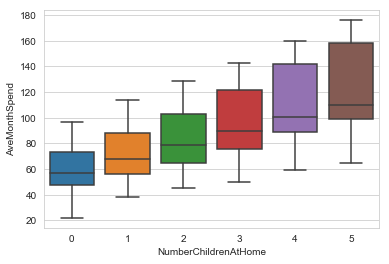

In [118]:
plot_box(AdvWorksCustsMergedFull, ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag'  ,'NumberCarsOwned'  ,'NumberChildrenAtHome'],'AveMonthSpend' )

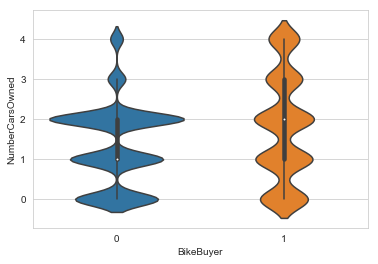

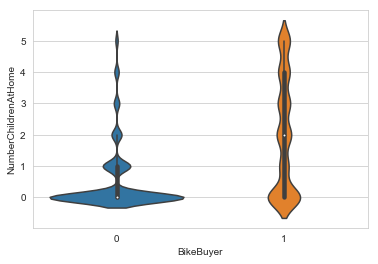

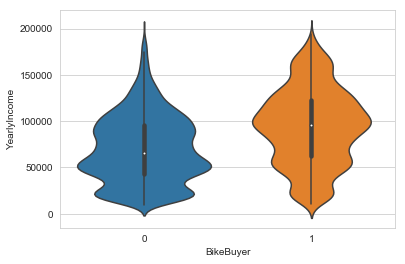

In [119]:
def plot_violinclass(data, cols, col_x):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data=data)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_violinclass(AdvWorksCustsMergedFull, ['NumberCarsOwned',  'NumberChildrenAtHome', 'YearlyIncome'],'BikeBuyer'  )

CountryRegionName


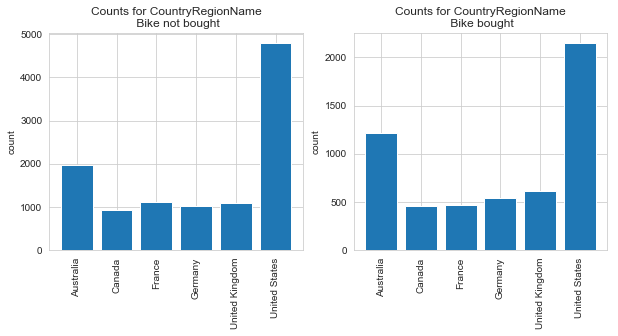

Education


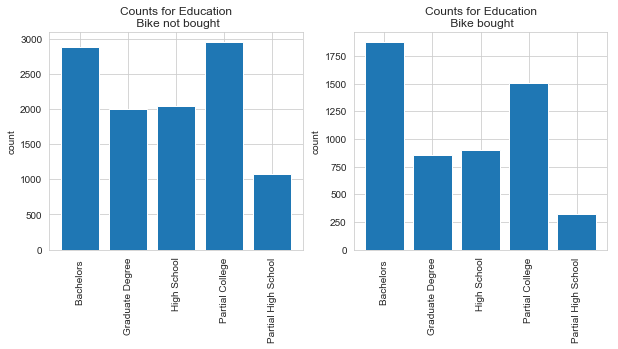

Occupation


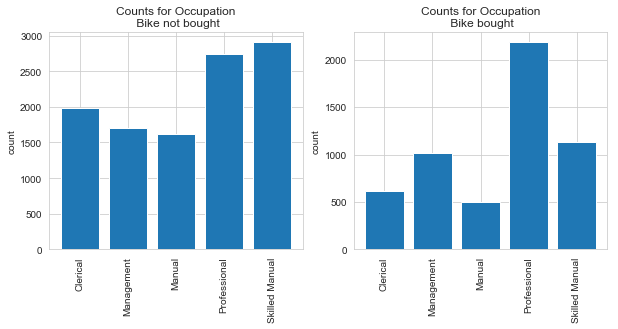

Gender


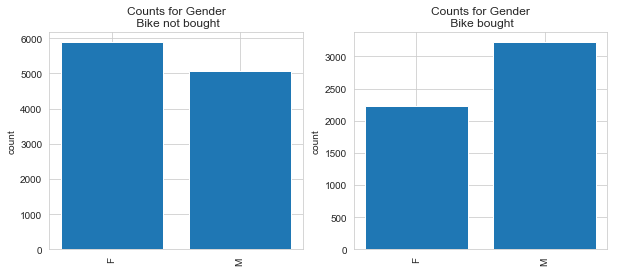

MaritalStatus


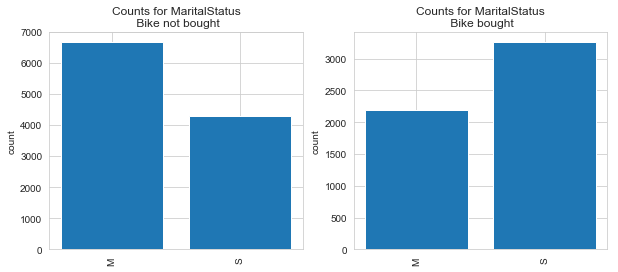

HomeOwnerFlag


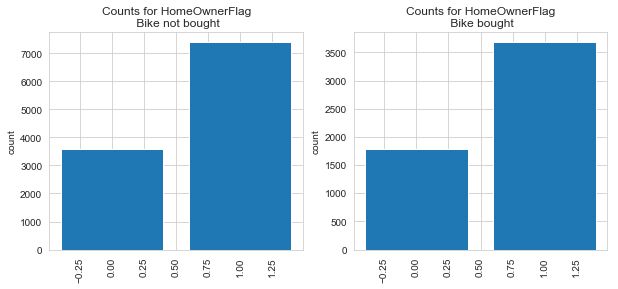

NumberCarsOwned


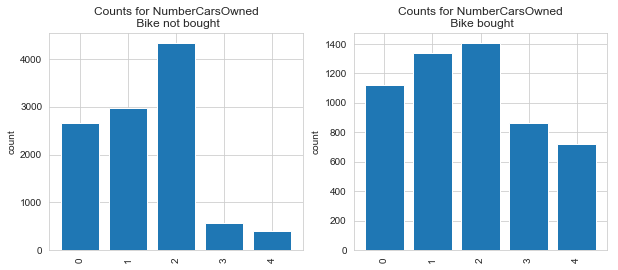

NumberChildrenAtHome


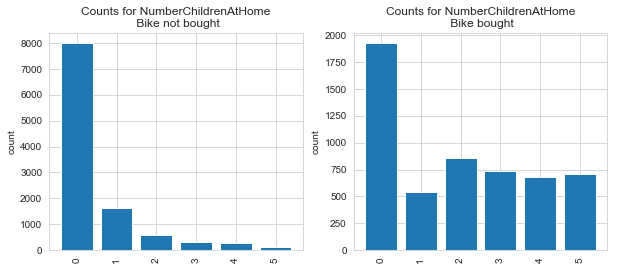

In [120]:
import numpy as np
cat_cols = ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag'  ,'NumberCarsOwned'  ,'NumberChildrenAtHome']

AdvWorksCustsMergedFull['dummy'] = np.ones(shape = AdvWorksCustsMergedFull.shape[0])

for col in cat_cols:
    print(col)
    counts = AdvWorksCustsMergedFull[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Bike not bought')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Bike bought')
    plt.ylabel('count')
    plt.show()

In [121]:
AdvWorksCustsMergedFull['BirthDate'].head()

0    1966-04-08
1    1965-05-14
2    1965-08-12
3    1968-02-15
4    1968-08-08
Name: BirthDate, dtype: object

In [122]:
AdvWorksCustsMergedFull['BirthDateConv'] =  pd.to_datetime(AdvWorksCustsMergedFull['BirthDate'],format = "%Y-%m-%d", errors='coerce')

In [123]:
AdvWorksCustsMergedFull['BirthDateConv'].head()

0   1966-04-08
1   1965-05-14
2   1965-08-12
3   1968-02-15
4   1968-08-08
Name: BirthDateConv, dtype: datetime64[ns]

In [124]:
AdvWorksCustsMergedFull['Age'] = pd.to_datetime('1998-01-01',format = "%Y-%m-%d") - AdvWorksCustsMergedFull['BirthDateConv']

In [125]:
AdvWorksCustsMergedFull['Age'].head()

0   11591 days
1   11920 days
2   11830 days
3   10913 days
4   10738 days
Name: Age, dtype: timedelta64[ns]

In [126]:
AdvWorksCustsMergedFull['AgeYear'] = AdvWorksCustsMergedFull['Age'].dt.days / 365

In [127]:
AdvWorksCustsMergedFull['AgeYear'].head()

0    31.756164
1    32.657534
2    32.410959
3    29.898630
4    29.419178
Name: AgeYear, dtype: float64

In [128]:
AdvWorksCustsMergedFull['AgeYearBins'] = 'none'
AdvWorksCustsMergedFull['AgeYearBins'][(AdvWorksCustsMergedFull['AgeYear'] <25)] = '0-25'

AdvWorksCustsMergedFull['AgeYearBins'][(AdvWorksCustsMergedFull['AgeYear'] >= 25) & (AdvWorksCustsMergedFull['AgeYear'] <=45)] = '25-45'

AdvWorksCustsMergedFull['AgeYearBins'][(AdvWorksCustsMergedFull['AgeYear'] > 45)] = '45+'

c:\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [129]:
AdvWorksCustsMergedFull['AgeYearBins'].head()

0    25-45
1    25-45
2    25-45
3    25-45
4    25-45
Name: AgeYearBins, dtype: object

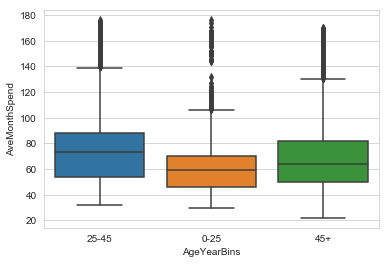

In [130]:
plot_box(AdvWorksCustsMergedFull, ['AgeYearBins'], 'AveMonthSpend' )

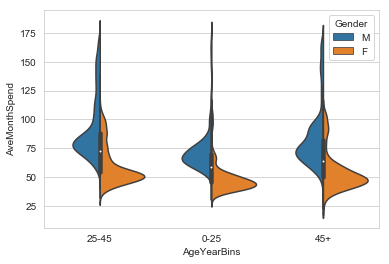

In [131]:
def plot_violin_hue(data, cols, col_y, hue_col):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=data, hue = hue_col, split = True)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

plot_violin_hue(AdvWorksCustsMergedFull, ['AgeYearBins'], 'AveMonthSpend','Gender' )

In [132]:
def dataprep(data):
    data['BirthDateConv'] =  pd.to_datetime(data['BirthDate'],format = "%Y-%m-%d", errors='coerce')
    data['Age'] = pd.to_datetime('1998-01-01',format = "%Y-%m-%d") - data['BirthDateConv']
    data['AgeYear'] = data['Age'].dt.days / 365
    data['AgeYearBins'] = 'none'
    data['AgeYearBins'][(data['AgeYear'] <25)] = '0-25'
    data['AgeYearBins'][(data['AgeYear'] >= 25) & (data['AgeYear'] <=45)] = '25-45'
    data['AgeYearBins'][(data['AgeYear'] > 45)] = '45+'
    data['ChildrenAtHome'] = 1
    data['ChildrenAtHome'][(data['NumberChildrenAtHome'] == 0)] = 0
    data['Threepluscars'] = 0
    data['Threepluscars'][(data['NumberCarsOwned'] > 2)] = 1 
    
    
    

In [133]:
dataprep(AdvWorksCustsMergedFull)

c:\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

In [134]:
AdvWorksCustsMergedFull.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,dummy,Age,AgeYear,ChildrenAtHome,Threepluscars
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.0,16404,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78128.531517,72.389905,0.332297,1.0,13131 days 09:28:02.809070,35.976423,0.395026,0.155816
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39726.533060,27.269568,0.471051,0.0,4107 days 02:32:05.215131,11.252344,0.488871,0.362692
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000,1.0,6215 days 00:00:00,17.027397,0.000000,0.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47811.750000,52.000000,0.000000,1.0,9967 days 18:00:00,27.308904,0.000000,0.000000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000,68.000000,0.000000,1.0,12580 days 00:00:00,34.465753,0.000000,0.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105200.250000,84.000000,1.000000,1.0,15812 days 18:00:00,43.322603,1.000000,0.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000,1.0,31918 days 00:00:00,87.446575,1.000000,1.000000


In [135]:
AdvWorksCustsMergedFull.shape

(16404, 32)

In [136]:
AdvWorksCustsMergedFull.CustomerID.unique().shape

(16404,)

In [137]:
AdvWorksCustsMergedFull.drop_duplicates(subset= 'CustomerID', keep = 'first', inplace= True)

In [138]:
AdvWorksCustsMergedFull.shape

(16404, 32)

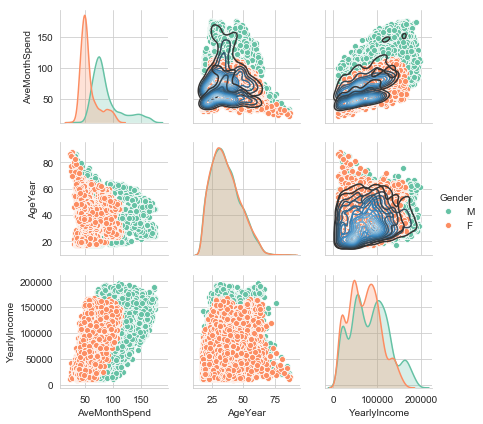

In [139]:
num_cols = ["AveMonthSpend", "AgeYear", "YearlyIncome", "Gender"] 
sns.pairplot(AdvWorksCustsMergedFull[num_cols], hue = "Gender", palette="Set2", diag_kind="kde", height=2).map_upper(sns.kdeplot, cmap="Blues_d")

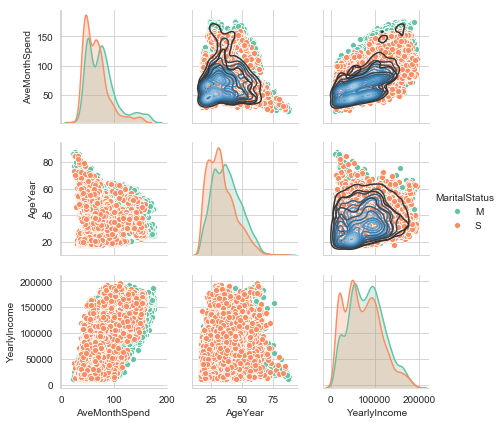

In [140]:
num_cols = ["AveMonthSpend", "AgeYear", "YearlyIncome", "MaritalStatus"] 
sns.pairplot(AdvWorksCustsMergedFull[num_cols], hue = "MaritalStatus", palette="Set2", diag_kind="kde", height=2).map_upper(sns.kdeplot, cmap="Blues_d")

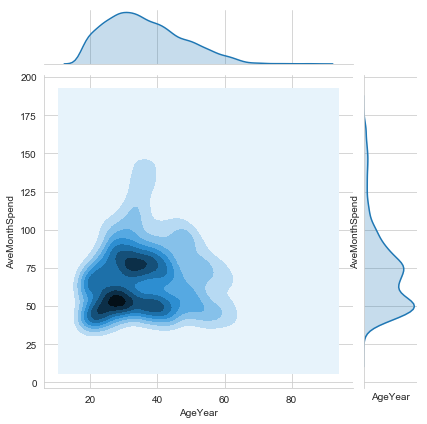

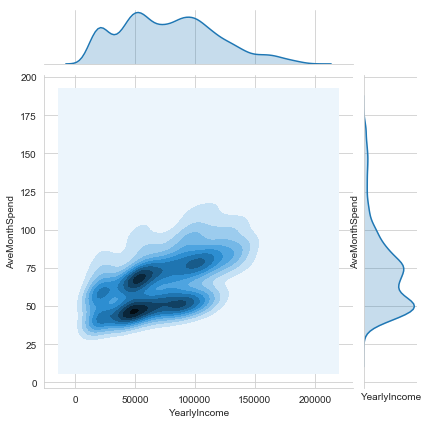

In [141]:
def plot_desity_2d(data, cols, col_y , kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=data, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
num_cols = ["AgeYear", "YearlyIncome"]
plot_desity_2d(AdvWorksCustsMergedFull, num_cols, "AveMonthSpend")      